# Data Cleaning & Sentiment Analysis with Twitter API

**Sentiment Analysis** refers to the use of natural language processing and text analysis to extract, classify, and quantify **subjective** information. In this project, I will extract tweets from Twitter and process this textual data to determine subjectivity and polarity. I can also reproduce the same approach on specific Twitter accounts to classify an individual on a subjective scale. 
<hr>

### Questions 

* What portions of the imported dataset is relevant? 
* What library can we use to label subjectivity and polarity? 
* How many positive, negative, neutral tweets are in the dataset? How about for x account? 
* How can we visualize the quantity and frequency of the textual data? 
* What can we extrapolate or conclude from extracting the subjectivity and polarity of a certain dataset? 


### Imports and Datasets

In [187]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from wordcloud import WordCloud
from textblob import TextBlob

# Part I:
## Sentiment Analysis of Random Tweets

In [188]:
read = pd.read_csv('tweets-1.6.csv', encoding = 'latin1')
read

,TweetID,Date,Query,UserID,Tweet
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...
2994,1468493731,Tue Apr 07 02:00:46 PDT 2009,NO_QUERY,shortyyyy,@ZoeAimee I'm trying to research some dude for...
2995,1468494392,Tue Apr 07 02:00:58 PDT 2009,NO_QUERY,xhardtoforget,"just got up, pshhh going on the trampoline, ev..."
2996,1468494732,Tue Apr 07 02:01:04 PDT 2009,NO_QUERY,amielia_1991,Homework
2997,1468494789,Tue Apr 07 02:01:09 PDT 2009,NO_QUERY,dessey,@pmarnandus re: daily gossip.. well the twitte...


In [189]:
data = read[['Tweet']]
data.columns = ['Tweets']
data

,Tweets
0,is upset that he can't update his Facebook by ...
1,@Kenichan I dived many times for the ball. Man...
2,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all...."
4,@Kwesidei not the whole crew
...,...
2994,@ZoeAimee I'm trying to research some dude for...
2995,"just got up, pshhh going on the trampoline, ev..."
2996,Homework
2997,@pmarnandus re: daily gossip.. well the twitte...


In [191]:
def clean_table(txt): 
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt) #removes @ mentions 
    txt = re.sub(r'#','', txt) #removes hashtags
    txt = re.sub(r'RT[\s]+', '', txt) #removes retweet
    txt = re.sub(r'https?:\/\/\S+', '', txt) #removes hyperlink
    return txt 

In [192]:
data['Tweets'] = data['Tweets'].apply(clean_table)

<ipython-input-192-913b98c6887e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweets'] = data['Tweets'].apply(clean_table)


In [193]:
data

,Tweets
0,is upset that he can't update his Facebook by ...
1,I dived many times for the ball. Managed to s...
2,my whole body feels itchy and like its on fire
3,"no, it's not behaving at all. i'm mad. why am..."
4,not the whole crew
...,...
2994,I'm trying to research some dude for my engli...
2995,"just got up, pshhh going on the trampoline, ev..."
2996,Homework
2997,re: daily gossip.. well the twitter gossips a...


In [194]:
def subjective(txt): 
    #The subjectivity is a float within the range [0.0, 1.0] 
    ## where 0.0 is very objective and 1.0 is very subjective.
    return TextBlob(txt).sentiment.subjectivity 

In [195]:
def polarity(txt):
    #The polarity score is a float within the range [-1.0, 1.0]
    ## where -1 is very negative and 1 is very positive 
    return TextBlob(txt).sentiment.polarity

In [196]:
data['Subjectivity'] = data['Tweets'].apply(subjective)
data['Polarity'] = data['Tweets'].apply(polarity)

<ipython-input-196-1f1cdaab04b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Subjectivity'] = data['Tweets'].apply(subjective)
<ipython-input-196-1f1cdaab04b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Polarity'] = data['Tweets'].apply(polarity)


In [197]:
data

,Tweets,Subjectivity,Polarity
0,is upset that he can't update his Facebook by ...,0.0000,0.000000
1,I dived many times for the ball. Managed to s...,0.5000,0.500000
2,my whole body feels itchy and like its on fire,0.4000,0.200000
3,"no, it's not behaving at all. i'm mad. why am...",1.0000,-0.625000
4,not the whole crew,0.4000,0.200000
...,...,...,...
2994,I'm trying to research some dude for my engli...,0.1875,-0.062500
2995,"just got up, pshhh going on the trampoline, ev...",0.0000,0.000000
2996,Homework,0.0000,0.000000
2997,re: daily gossip.. well the twitter gossips a...,0.2500,0.488281


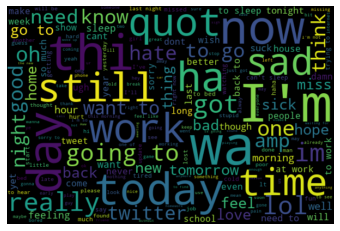

In [198]:
words = ' '.join( [tweets for tweets in data['Tweets']] )
cloud = WordCloud(width=600, height=400, random_state=10,
                  max_font_size=100).generate(words)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [199]:
#positive, negative, neutral sentiments 
def sentiment(score):
    if score > 0: 
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [200]:
data['Sentiment'] = data['Polarity'].apply(sentiment)

<ipython-input-200-f887cde708c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Polarity'].apply(sentiment)


In [201]:
data

,Tweets,Subjectivity,Polarity,Sentiment
0,is upset that he can't update his Facebook by ...,0.0000,0.000000,Neutral
1,I dived many times for the ball. Managed to s...,0.5000,0.500000,Positive
2,my whole body feels itchy and like its on fire,0.4000,0.200000,Positive
3,"no, it's not behaving at all. i'm mad. why am...",1.0000,-0.625000,Negative
4,not the whole crew,0.4000,0.200000,Positive
...,...,...,...,...
2994,I'm trying to research some dude for my engli...,0.1875,-0.062500,Negative
2995,"just got up, pshhh going on the trampoline, ev...",0.0000,0.000000,Neutral
2996,Homework,0.0000,0.000000,Neutral
2997,re: daily gossip.. well the twitter gossips a...,0.2500,0.488281,Positive


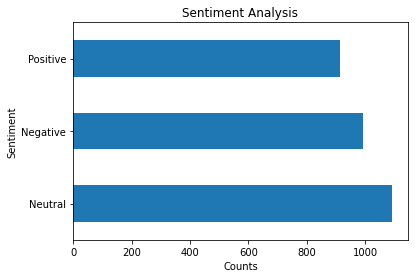

In [362]:
values = data['Sentiment'].value_counts()
values.plot(kind='barh',  figsize=(6, 4), width=0.5)
plt.title('Sentiment Analysis')
plt.ylabel('Sentiment')
plt.xlabel('Counts')
plt.show()

<hr>

# Part II: 
# Sentiment Analysis of a User

Previously, I used a larage dataset of random tweets from Twitter. Now, let's perform a similar prodecure on a particular Twitter account using Twitter's API. 

### Questions 

* What library can we use to work with Twitter's API?
* How many of Elon Musk's tweets are positive, negative, and neutral? 
* What are the most common words within the positive, negative, or neutral tweets? (Since I'm using Elon's account, I would predict that words such as 'Telsa', 'Model', 'SpaceX', or 'Cybertruck' to be the most common positive words)
* What can we extrapolate or conclude from extracting the subjectivity and polarity of Elon's tweets? Can this tell us that he is a relatively more positive or negative person on Twitter? 

In [260]:
import sys
!{sys.executable} -m pip install tweepy

In [261]:
import tweepy

In [262]:
#read twitter authentication keys
keys = pd.read_csv('private.csv')

In [374]:
auth = tweepy.OAuthHandler(keys['TWITTER_APP_KEY'][0], keys['TWITTER_APP_SECRET'][0]) #consumer API keys
auth.set_access_token(keys['TWITTER_KEY'][0] , keys['TWITTER_SECRET'][0]) #access tokens 
api = tweepy.API(auth, wait_on_rate_limit=True)

<hr>
Now that we have accessed Twitter's API, let's print out a few tweets from my own homepage. 
<hr>

In [375]:
public_tweets = api.home_timeline(count=10)
n=1
for tweet in public_tweets: 
    print(str(n) + '.' + ' ' + tweet.text + '\n')
    n=n+1 

1. “We would be remiss if we didn't…reflect intently on all the things those monuments came to symbolise.” On our “Che… https://t.co/nQMjInHb5B

2. At Benjamin Swan’s farm, there is not a speck of soil in sight https://t.co/nZOb3kshvD

3. Could you imagine being the sharpest galaxy in the cosmos?  ✨✨

That honor currently goes to the Knife Edge galaxy… https://t.co/2LGnB720N6

4. Recent Supreme Court rulings in America might seem like a leftward shift. But on “The Intelligence” @stevenmazie sa… https://t.co/UJsnyHNajo

5. Why is the finest Bordeaux now so cheap (relatively speaking)? @DanRosenheck tells “The Intelligence” that a future… https://t.co/nuaSIUNJcv

6. Egypt, Ethiopia and Sudan cannot strike a deal on one major issue: how to handle a drought https://t.co/J2KPy3Kqq3

7. A new report accuses Chinese companies of “malpractices”, including inflating costs https://t.co/2oLMG3POjF

8. TikTok had a way of leading curious users far from the big cities and celebrities that typically

# Tweets from Elon Musk

Now let's extract tweets specifically from Elon Musk's Twitter page.<br><br>**Note:**  Since these cells are utilizing an API, we can rerun these inputs to output any new tweets from the particular account. 

In [376]:
tweets = api.user_timeline(screen_name = 'elonmusk', count = 200, tweet_mode = 'extended', lang = 'en')
for tweet in tweets[0:10]:
    print(tweet.full_text + '\n')

@WhatsupFranks @flcnhvy @RationalEtienne @chrish7985 @rlyrlysryDave Yes

@flcnhvy @RationalEtienne @chrish7985 @rlyrlysryDave The news is sometimes created, but always curated. The latter is most pernicious. On any given day, there are thousands of potential stories. By picking which stories are written about &amp; how prominently they’re placed, a handful of publishers control much of the public narrative.

@flcnhvy @RationalEtienne @chrish7985 @rlyrlysryDave Klippenstein has gone full twitter troll. Big mistake. Never go full troll!

@RationalEtienne @chrish7985 @rlyrlysryDave Oh yeah, Klip Einstein, pseudojournalist &amp; douche-about-town

@EvaFoxU @chrish7985 @rlyrlysryDave 😂😂

@chrish7985 @rlyrlysryDave Someone is paying for hundreds of bots &amp; trolls to push this lame Vanity Fair photobomb pic. I wonder who …

@Martx1995 @pesachlattin 🤣🤣 true

@pesachlattin This is false. I have never introduced either of them to anyone.

@PPathole @HandleOfRy Yeah

@usa_comes_back @geekwire 

### Working with a Dataframe
We need to append our tweets into a new dataframe and can use the ``apply(clean_table)`` function that we created earlier in the notebook. 

In [377]:
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns = ['Tweets'])
df

,Tweets
0,@WhatsupFranks @flcnhvy @RationalEtienne @chrish7985 @rlyrlysryDave Yes
1,"@flcnhvy @RationalEtienne @chrish7985 @rlyrlysryDave The news is sometimes created, but always c..."
2,@flcnhvy @RationalEtienne @chrish7985 @rlyrlysryDave Klippenstein has gone full twitter troll. B...
3,"@RationalEtienne @chrish7985 @rlyrlysryDave Oh yeah, Klip Einstein, pseudojournalist &amp; douch..."
4,@EvaFoxU @chrish7985 @rlyrlysryDave 😂😂
...,...
195,@cleantechnica Confirmed
196,@MichaelaOkla @holy_schnitt https://t.co/tUB8Htz4sZ
197,@TeslaPhx @Tesla 🤣🤣
198,@teslaownersSV @Teslarati We are considering several options


In [378]:
df['Tweets'] = df['Tweets'].apply(clean_table)
df

,Tweets
0,Yes
1,"The news is sometimes created, but always curated. The latter is most pernicious. On any giv..."
2,Klippenstein has gone full twitter troll. Big mistake. Never go full troll!
3,"Oh yeah, Klip Einstein, pseudojournalist &amp; douche-about-town"
4,😂😂
...,...
195,Confirmed
196,_schnitt
197,🤣🤣
198,We are considering several options


Adding  **Subjectivity,   Polarity,  and  Sentiment**  columns to our dataframe 

In [379]:
df['Subjectivity'] = df['Tweets'].apply(subjective)
df['Polarity'] = df['Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentiment)
df

,Tweets,Subjectivity,Polarity,Sentiment
0,Yes,0.000000,0.0000,Neutral
1,"The news is sometimes created, but always curated. The latter is most pernicious. On any giv...",0.461111,0.2000,Positive
2,Klippenstein has gone full twitter troll. Big mistake. Never go full troll!,0.400000,0.2625,Positive
3,"Oh yeah, Klip Einstein, pseudojournalist &amp; douche-about-town",0.000000,0.0000,Neutral
4,😂😂,0.000000,0.0000,Neutral
...,...,...,...,...
195,Confirmed,1.000000,0.4000,Positive
196,_schnitt,0.000000,0.0000,Neutral
197,🤣🤣,0.000000,0.0000,Neutral
198,We are considering several options,0.000000,0.0000,Neutral


### Listing tweets that contain a specific string. 

In [380]:
n = 1 
for i in np.arange(df.shape[0]):
    if df['Tweets'].str.contains('C19')[i]: 
        print( str(n) + ')'  + df['Tweets'][i] + '\n')
        n = n + 1 

1)  As you’d expect, this has resulted in a proportionately very high number of C19 false positives. Field test reliability we are seeing is best case 5%, worst case 50% false positive. Much worse than lab accuracy.

2)    Extremely big difference between died because of or died with. Also, did the person actually have C19 or did they just have C19 symptoms? It’s almost impossible to die without feeling weakness, shortness of breath or other C19 symptoms, unless you were crushed by a falling piano.

3) There are a lot of C19 false positives messing up the numbers. Even tests with 5% false positive rate (in *field*, not lab) would show up as ~17 million  fake C19 cases even if there were actually none.

4) There are a ridiculous number of false positive C19 tests, in some cases ~50%. False positives scale linearly with  of tests. This is a big part of why C19 positive tests are going up while hospitalizations &amp; mortality are declining. Anyone who tests positive should retest.



# Wordcloud Analysis - Elon Musk
In the following cells, we can see Elon Musk's most commonly used words, most commonly used positive words, and most commonly used negative words in his tweets. <br><br> For his most used words, it is no surprise that *Telsa* was generated since it's his own company. Similarly, *Cybertruck* was also generated which Tesla unveiled last year as its newest vehicle. It is very likely that the majority of Elon's tweets were catered to promoting and marketing the Cybertruck. There are a handful of other implications we can draw from this data. <br><br> For example, by seeing *July* and considering that the vast majority of these tweets occurred **before July**, it can be assumed that Elon was tweeting many announcements for Tesla or SpaceX that would be happening in the month of July. <br><br> Elon actually says *C19* instead of COVID-19, which has not only been a popular term in the world currently, but particularly in his recent tweets. <br><br> *Titans* likely refers to **Project Titan**, an attempt by Tesla to  replace defective solar-panel parts across the US <br><br> **RECALL:** *amp* appears so frequently because `&` is encoded as `&amp;` in HTML <br><br>

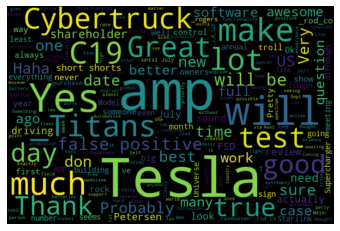

In [381]:
#wordcloud for all words
words = ' '.join( [tweets for tweets in df['Tweets']] )
cloud = WordCloud(width=600, height=400, random_state=10,
                  max_font_size=100).generate(words)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Overwhelming positive tweets include *Tesla*; he has many positive comments on his company which is expected from the CEO
* Some words such as *better, good, great, first, and best* are more expected to be found in positive tweets

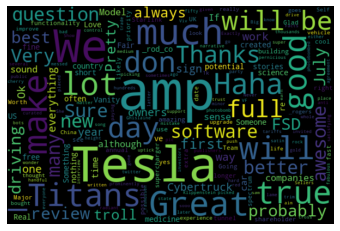

In [382]:
#wordcloud for positive words
words = ' '.join( df[df['Sentiment'] == 'Positive']['Tweets'].values )
cloud = WordCloud(width=600, height=400, random_state=10,
                  max_font_size=100).generate(words)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* **C19** or COVID-19 takes the overwhelming majority of negative tweets from Elon.
* We can now ask questions to why that is. Where does the negativity point to? U.S administration? U.S public? 

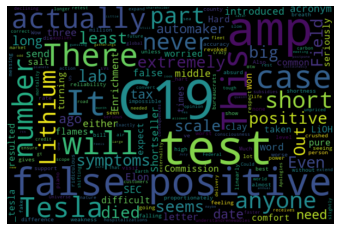

In [383]:
#wordcloud for negative words
words = ' '.join( df[df['Sentiment'] == 'Negative']['Tweets'].values )
cloud = WordCloud(width=600, height=400, random_state=10,
                  max_font_size=100).generate(words)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [384]:
#let's print all of the positive tweets, starting with the most positive to the least positive 

sortPolarity = df.sort_values(by=['Polarity'])
n = 1 

for i in np.arange(sortPolarity.shape[0]):
    if sortPolarity['Sentiment'][i] == 'Positive': 
        print(str(n) + '.' + sortPolarity['Tweets'][i] + '\n')
        n = n+1 

1.    The news is sometimes created, but always curated. The latter is most pernicious. On any given day, there are thousands of potential stories. By picking which stories are written about &amp; how prominently they’re placed, a handful of publishers control much of the public narrative.

2.    Klippenstein has gone full twitter troll. Big mistake. Never go full troll!

3.  Someone is paying for hundreds of bots &amp; trolls to push this lame Vanity Fair photobomb pic. I wonder who …

4.  🤣🤣 true

5.  Pretty much

6.  Thanks!

7. Don’t know Ghislaine at all. She photobombed me once at a Vanity Fair party several years ago. Real question is why VF invited her in the first place 🤔

8. Thanks Viv, you rock 💕

9.  Sure, we will aim to do a cross-country drive with Cybertruck later this year

10. Ok fine 🤣🤣

11.    Exactly

12.Thanks Tesla owners &amp; investors! Love you!! We will work super hard to earn your trust &amp; support. 

13. Not bad

14. But sooo satisfying

15. Should have a 

In [385]:
#let's print all of the negative tweets

sortPolarity = df.sort_values(by=['Polarity'], ascending=False)
n = 1 

for i in np.arange(sortPolarity.shape[0]):
    if sortPolarity['Sentiment'][i] == 'Negative': 
        print(str(n) + '.' + sortPolarity['Tweets'][i] + '\n')
        n = n+1 

1. This is false. I have never introduced either of them to anyone.

2.SEC, three letter acronym, middle word is Elon’s

3.Will send some to the Shortseller Enrichment Commission to comfort them through these difficult times

4. I worried we won’t be taken seriously if our short shorts have flames 🤣🤣

5._tesla  Lithium is common. Hard part is turning lithium salt or clay into extremely pure LiOH.

6.  As you’d expect, this has resulted in a proportionately very high number of C19 false positives. Field test reliability we are seeing is best case 5%, worst case 50% false positive. Much worse than lab accuracy.

7.  Wow, I’ve never seen this level of support! Out of respect, seems like I should at least visit.

8.    Extremely big difference between died because of or died with. Also, did the person actually have C19 or did they just have C19 symptoms? It’s almost impossible to die without feeling weakness, shortness of breath or other C19 symptoms, unless you were crushed by a falling p

In [386]:
#neutral tweets
n = 1 
for i in np.arange(df.shape[0]):
    if df['Sentiment'][i] == 'Neutral':
        print( str(n) + '.' + df['Tweets'][i] + '\n')
        n = n +1 

1.     Yes

2.   Oh yeah, Klip Einstein, pseudojournalist &amp; douche-about-town

3.   😂😂

4.  Yeah

5._comes_back  Sounds sketch

6. Haute couture

7._AA_Carmack Yes

8. Thank goodness! Front license plates make my eyes bleed.

9._Crew: Just over a month ago,  &amp; _Doug launched to the _Station aboard 's Crew Dragon.

This…

10. He wore them well. No denying it.

11. Busted! I secretly ♥️ short shorts.

12.  Yes

13. Those dang budgie smugglers!!

14.Who wears short shorts? 🤣🤣

15. _rasmussen _rod_co Thank you. Angie …

16._rasmussen _rod_co bs 

17.  I tried to warn them … 😢

18.   Yup

19.: Tesla crushes Wall Street’s Q2 estimates with over 90k deliveries $TSLA


20._rod_co _rasmussen Here’s one: 

21._rod_co _rasmussen Yes, Angela, please show us the graphs/data that prove your point

22.    Yes, at Tesla Grohmann

23.   Tesla, as a side project, is building RNA microfactories for CureVac &amp; possibly others

24. Seems fishy

25.  Crassus was a dick

26.  Hell of a decade

27.

## Visualizing Sentiment Analysis 
* Scatterplot 
* Bar chart

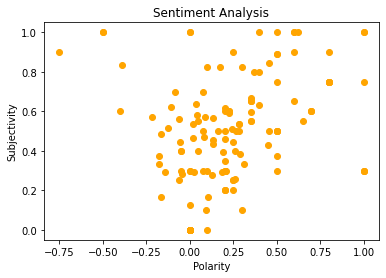

In [387]:
plt.figure()
for i in np.arange(df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'orange')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity')
plt.show()

In [388]:
df['Sentiment'].value_counts()

Positive    101
Neutral      78
Negative     21
Name: Sentiment, dtype: int64

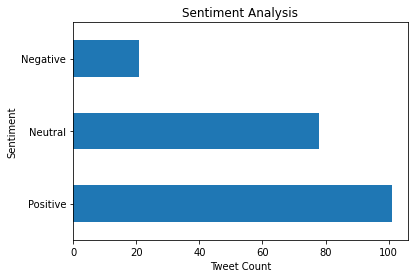

In [395]:
values = df['Sentiment'].value_counts()
values.plot(kind='barh',  figsize=(6, 4), width=0.5)
plt.title('Sentiment Analysis')
plt.ylabel('Sentiment')
plt.xlabel('Tweet Count')
plt.show()

# Elon Musk Twitter Conclusion

The overwhelming majority of Elon's recent tweets have been very positive. Many of the negative tweets actually deal with the COVID-19 panademic which is occuring right now and has undoubtedly erupted negative responses by the American public, which Elon has clearly been a part of as well. <br><br> We have seen what words were commonly used in the positive tweets as with the negative tweets and have made presumptions on why some specific words were used. *Tesla*, for example, took the majority of positive tweets which is expected from the CEO of the company. *Cybertruck* is another one, since it is his company's newest vehicle that will be released by the end of this year. <br><br>**Some things to consider**: 
* Tweets are encoded in HTML when using the API, thus the overpopulation of the phrase `&amp;` Users will use `&` either because it uses less characters, quicker to type, or just preference. Another relevant example of this is how Elon would use `C19` instead of COVID-19 which could be for any of the purposes mentioned previously.
* From the sentiment analysis, we can conclude that, **from Elon's past 200 tweets**, he has been posting more positive and neutral tweets than negative tweets. **However,** we cannot say that he must, in general, be a more positive person since our sample size was relatively small and tweets don't exactly correlate with a positive/negative character.